In [9]:
# Import the required libraries 

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 
from chart_studio import plotly as py
import seaborn as sns
import pandas as pd
import numpy as np


In [10]:
# Import the required libraries 

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 
from chart_studio import plotly as py
import seaborn as sns
import pandas as pd
import numpy as np

link = "https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/SuicideChina.csv"            # link to the dataset 

scd = pd.read_csv(link)
print(scd.shape)
scd.head()

(2571, 12)


,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [11]:
# The dataset has some columns that are not needed for our analysis, so I'm going to use index slicing instead

scd_1 = scd.iloc[:, 2:] # Takes all rows and the intended columns (Hospitalised  - Method)
scd_1.head()

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [12]:
scd_1.info() # Displays concised summary of our dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Hospitalised  2571 non-null   object
 1   Died          2571 non-null   object
 2   Urban         2571 non-null   object
 3   Year          2571 non-null   int64 
 4   Month         2571 non-null   int64 
 5   Sex           2571 non-null   object
 6   Age           2571 non-null   int64 
 7   Education     2571 non-null   object
 8   Occupation    2571 non-null   object
 9   method        2571 non-null   object
dtypes: int64(3), object(7)
memory usage: 201.0+ KB


In [13]:
scd_1.isna().sum() # checks the sum of null values 

Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64

In [14]:
for column in scd_1.columns: 
    print(scd_1[column].value_counts()) # Value counts of all the column elements
    print('-'*35)  # Add 35 blank lines between columns

yes    1553
no     1018
Name: Hospitalised, dtype: int64
-----------------------------------
no     1315
yes    1256
Name: Died, dtype: int64
-----------------------------------
no         2213
yes         277
unknown      81
Name: Urban, dtype: int64
-----------------------------------
2010    956
2011    866
2009    749
Name: Year, dtype: int64
-----------------------------------
6     284
5     263
7     247
9     241
8     229
10    211
2     208
4     208
1     201
3     190
11    153
12    136
Name: Month, dtype: int64
-----------------------------------
female    1328
male      1243
Name: Sex, dtype: int64
-----------------------------------
40     58
57     54
56     53
48     53
58     52
       ..
97      1
96      1
100     1
12      1
94      1
Name: Age, Length: 87, dtype: int64
-----------------------------------
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64
-----------------------------------
farmi

In [15]:
""""Statistical summary of our dataset shows that the minimum age is 12yrs while max age is 100yrs, 
the mean month is June and mean year is 2010"""

scd_1.describe().reset_index()

,index,Year,Month,Age
0,count,2571.000000,2571.000000,2571.000000
1,mean,2010.045508,6.298327,52.630883
2,std,0.791412,3.202515,19.783878
3,min,2009.000000,1.000000,12.000000
4,25%,2009.000000,4.000000,37.000000
5,50%,2010.000000,6.000000,53.000000
6,75%,2011.000000,9.000000,69.000000
7,max,2011.000000,12.000000,100.000000


In [16]:
""""Worthy to note that our minimum age is 1 person, this will help in the age classification later on """

scd_1[scd_1.Age == 12] 

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
1665,yes,no,no,2009,12,male,12,Secondary,student,Other poison


In [22]:
sns.displot(data =scd_1, x = 'Age', bins = 10, kde = False)

In [23]:
sns.boxplot(data =scd_1, x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

## 1. Distribution of Suicide Attempts over Time

In [35]:
# We create a plot_count function for the plots 

def plot_count(scd_1, column, hue = None):
    sns.set(style = "darkgrid")
    plt.figure(figsize = (8, 7))
    
    if hue:
        ax = sns.countplot(data = scd_1, x = column, hue = hue)
        ax.legend(title = hue, loc='upper right', bbox_to_anchor = (1.25, 1))
    else:
        ax = sns.countplot(data = scd_1, x = column)
    
    ax.set_title(f'Suicide attempts by {column}', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel("Count", fontsize = 14)
    ax.tick_params(labelsize = 12)
    plt.tight_layout()
    plt.show()


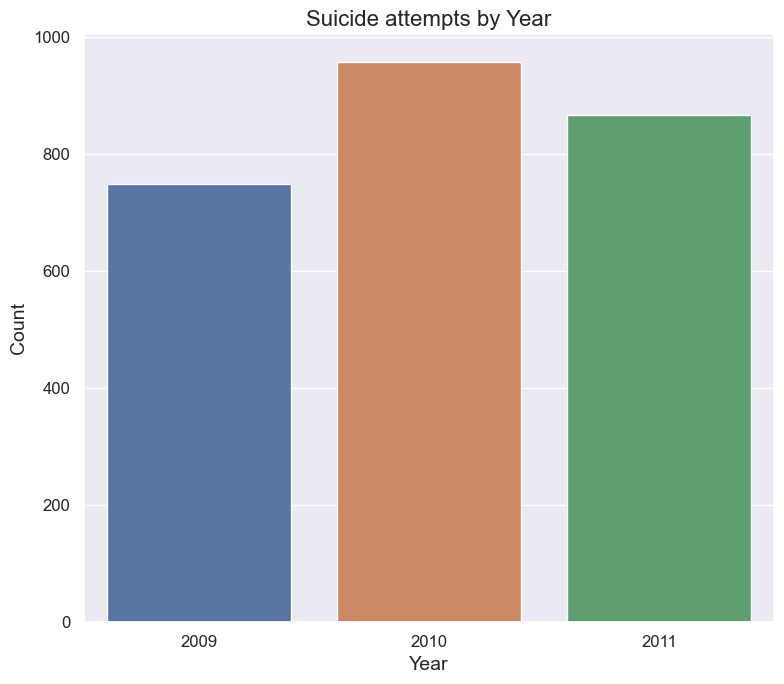

In [26]:
# We are dealing with 3 years statistics (2009 - 2011)

plot_count(scd_1, 'Year')

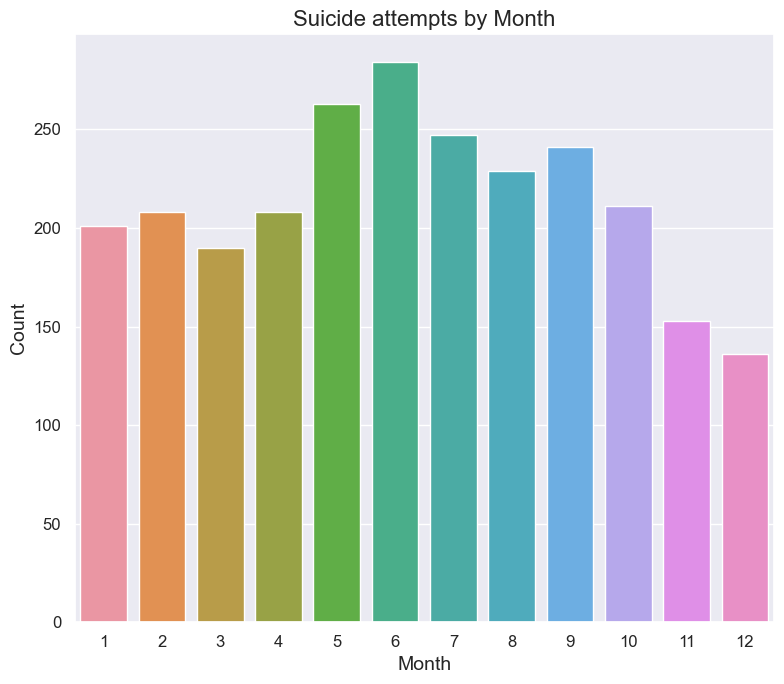

In [47]:
# During the summer months, suicides are more common

plot_count(scd_1, 'Month')

## 2. Demographic Characteristics of Individuals who Attempt Suicide

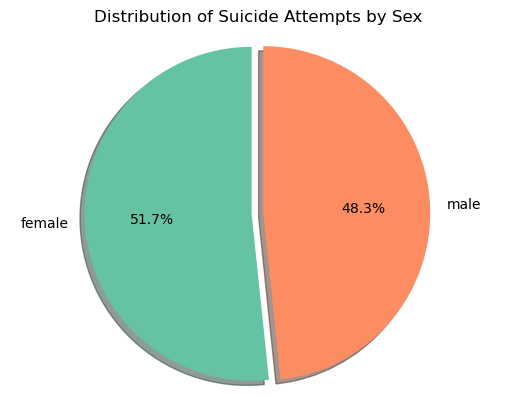

In [20]:
# Pie chart for distribution of suicide attempts by sex 

def plot_sex_distribution(scd_1, palette = 'Set2'):
    sex_counts = scd_1['Sex'].value_counts()
    labels = sex_counts.index
    sizes = sex_counts.values
    colors = sns.color_palette(palette)
    explode = (0, 0.07)  # Explode the second slice

    plt.pie(sizes, labels=labels, explode=explode, 
            colors=colors,
            autopct = '%1.1f%%', 
            shadow = True, 
            startangle = 90)
    plt.title('Distribution of Suicide Attempts by Sex')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Example usage:
plot_sex_distribution(scd_1)

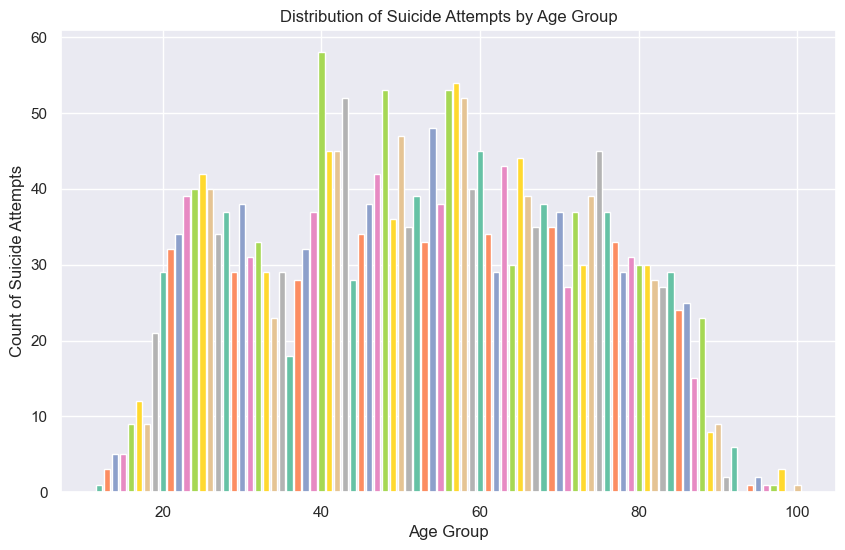

In [53]:
# Stacked bar chart for distribution of suicide attempts by age group

def plot_age_group_distribution(scd_1, palette = 'Set2'):
    age_group_counts = scd_1['Age'].value_counts().sort_index()
    colors = sns.color_palette(palette)
    age_groups = age_group_counts.index

    plt.bar(age_groups, age_group_counts, color=colors)
    plt.xlabel('Age Group')
    plt.ylabel('Count of Suicide Attempts')
    plt.title('Distribution of Suicide Attempts by Age Group')
    plt.show()

# Example usage:
plot_age_group_distribution(scd_1)

In [ ]:
# Old people are likely to die after commiting suicide than any other age class

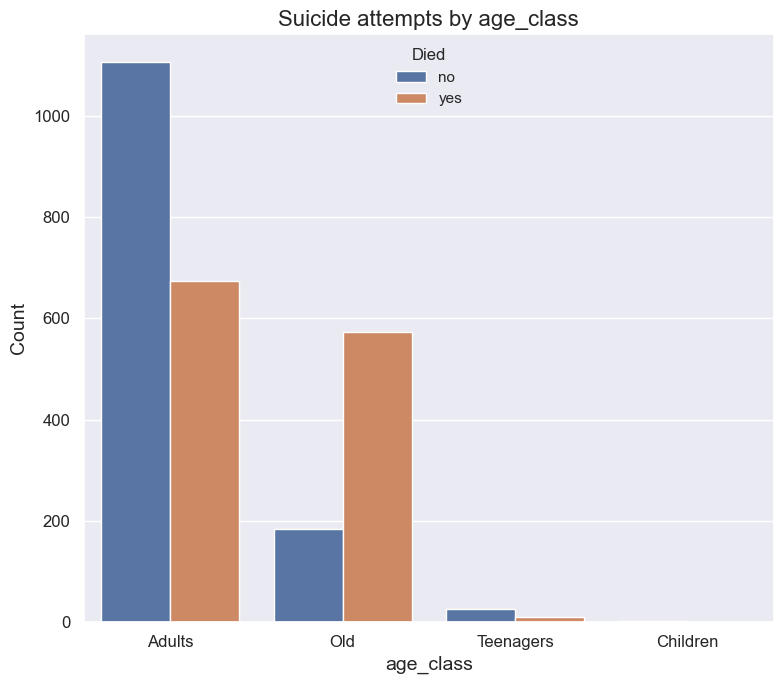

In [54]:
scd_2 = scd_1.copy() 

age_class = []
for age in scd_2.Age:
    if age < 13: 
        age_class.append('Children') 
    elif 13 <= age < 18:
        age_class.append('Teenagers')
    elif 18 <= age < 66:
        age_class.append('Adults')
    else:
        age_class.append('Old')
        
scd_2['age_class'] = age_class

plot_count(scd_2, 'age_class', hue = 'Died')

## 3. Difference in Suicide Attempts between Urban and Rural Areas

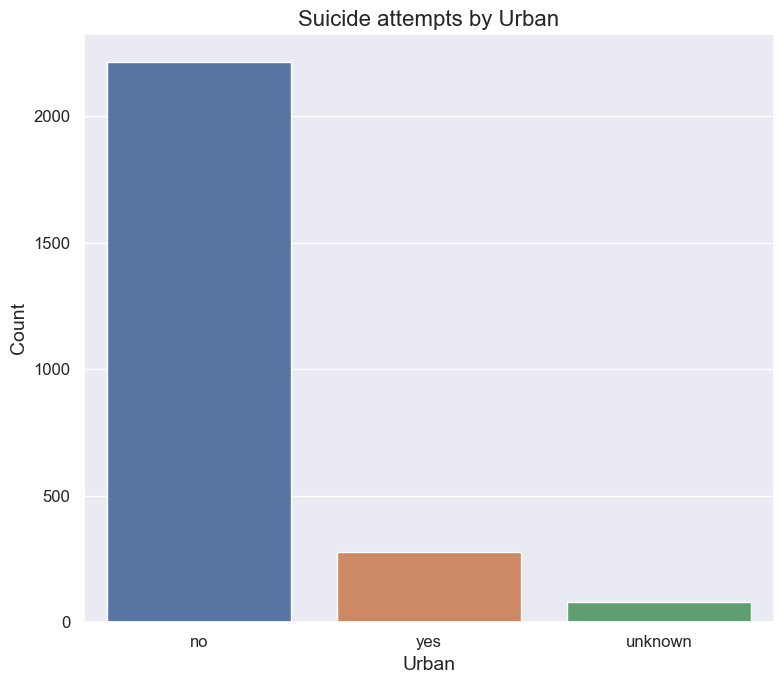

In [55]:
plot_count(scd_1, 'Urban')

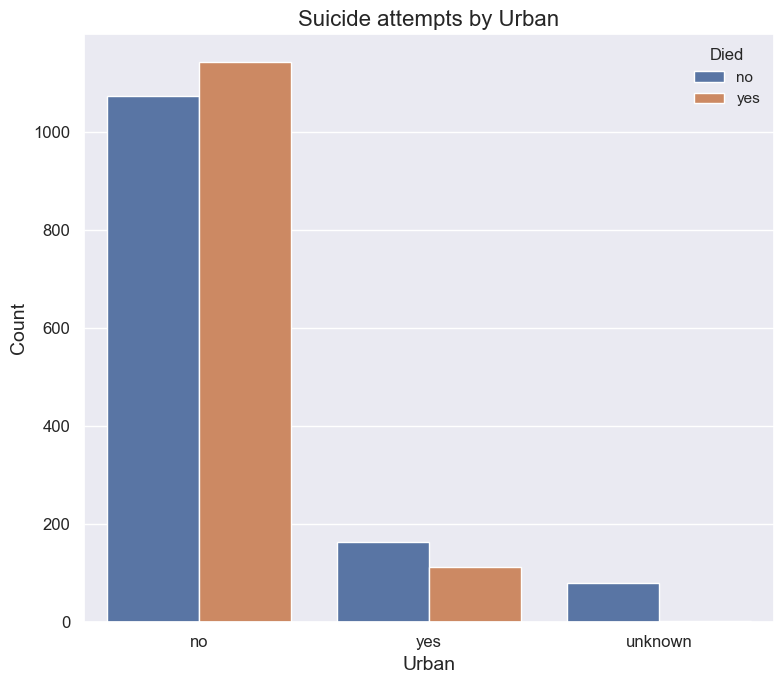

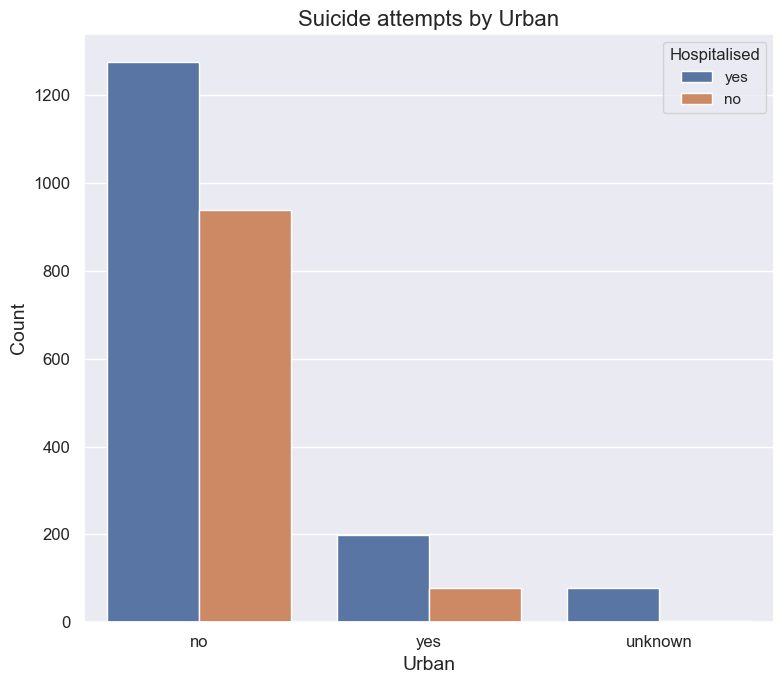

In [31]:
plot_count(scd_1, 'Urban', hue = 'Hospitalised')

## 4. Most Common Methods Used in Suicide Attempts

In [68]:
def create_count_plot(scd_1, column, title):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.countplot(data = scd_1, x = column)
    ax.set_title(title, size = 10)
    ax.set_ylabel('Count', size = 10)
    ax.set_xlabel(column, size = 10)
    ax.set_xticklabels(ax.get_xticklabels(), size = 10, rotation = 30)
    plt.show()

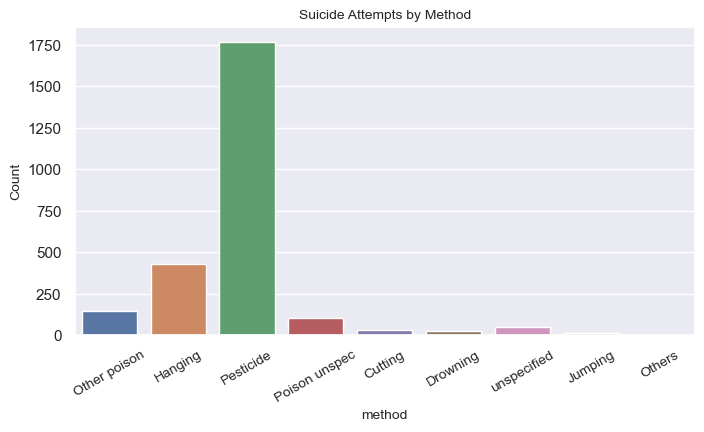

In [69]:
create_count_plot(scd_1, 'method', 'Suicide Attempts by Method')

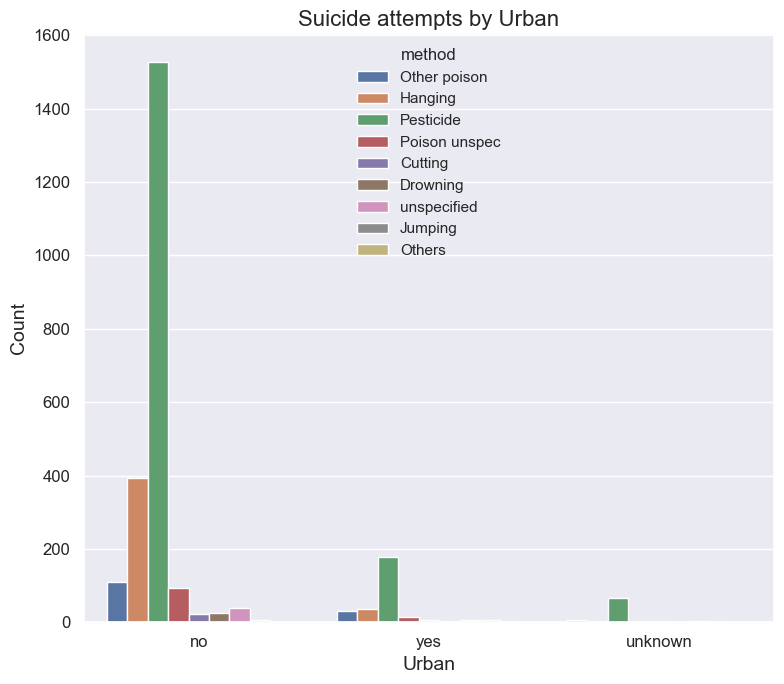

In [80]:
plot_count(scd_1, 'Urban', hue = 'method')

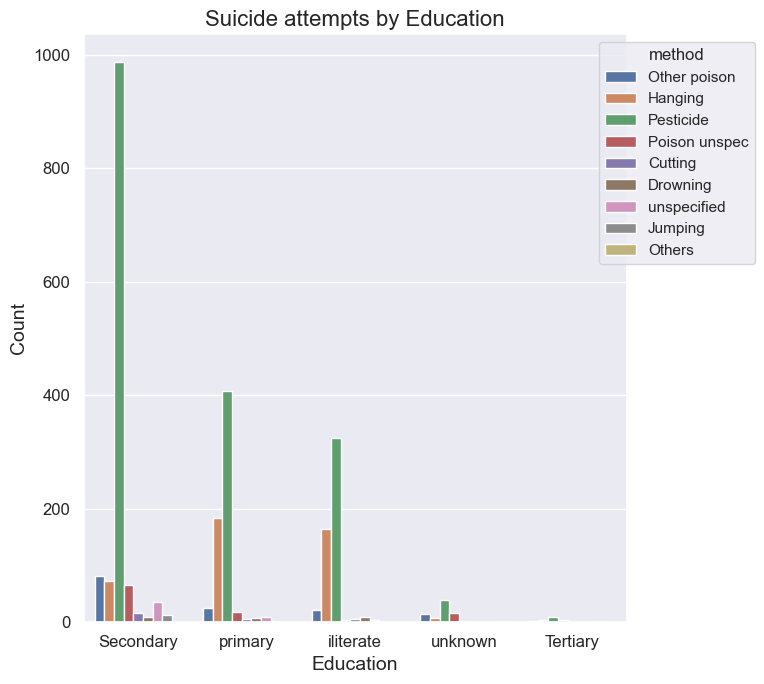

In [36]:
plot_count(scd_1, 'Education', hue = 'method')

## 5. Trends in Suicide Attempts by Age Group

## 6. Correlation between Education Levels and Suicide Attempts

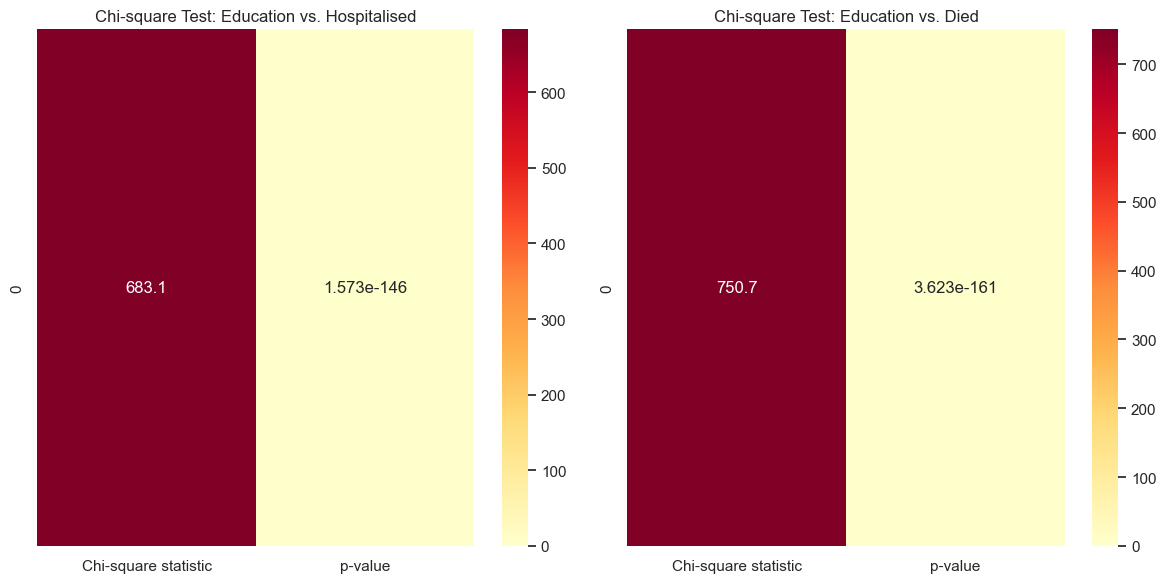

In [37]:
# Create a cross-tabulation table of 'Education' and 'Hospitalised'
edu_hos_cross_tab = pd.crosstab(scd_1['Education'], scd_1['Hospitalised'])

# Perform the chi-square test of independence
chi2_hos, p_value_hos, dof_hos, expected_hos = chi2_contingency(edu_hos_cross_tab)

# Create a cross-tabulation table of 'Education' and 'Died'
edu_died_cross_tab = pd.crosstab(scd_1['Education'], scd_1['Died'])

# Perform the chi-square test of independence
chi2_died, p_value_died, dof_died, expected_died = chi2_contingency(edu_died_cross_tab)

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot for 'Education' vs. 'Hospitalised'
chi2_result_hos = pd.DataFrame({'Chi-square statistic': [chi2_hos], 'p-value': [p_value_hos]})
sns.heatmap(chi2_result_hos, annot=True, fmt='.4g', cmap='YlOrRd', ax=ax1)
ax1.set_title('Chi-square Test: Education vs. Hospitalised')

# Second subplot for 'Education' vs. 'Died'
chi2_result_died = pd.DataFrame({'Chi-square statistic': [chi2_died], 'p-value': [p_value_died]})
sns.heatmap(chi2_result_died, annot=True, fmt='.4g', cmap='YlOrRd', ax=ax2)
ax2.set_title('Chi-square Test: Education vs. Died')

# Display the plots
plt.tight_layout()
plt.show()

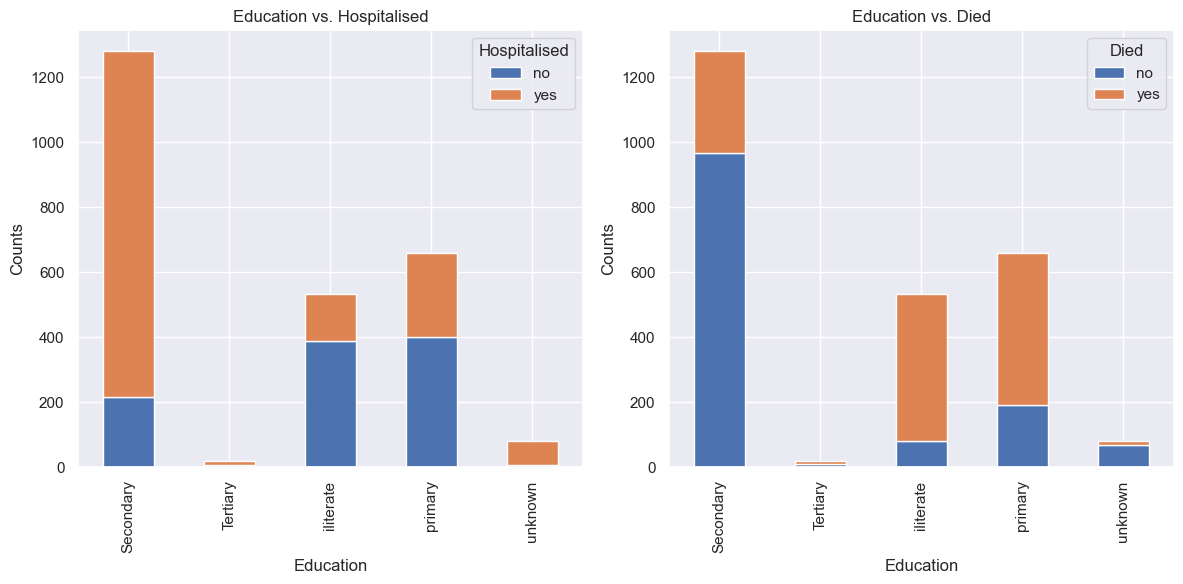

In [38]:
# Calculate proportions of suicide attempts by education level
# edu_hos = edu_hos_cross_tab.div(edu_hos_cross_tab.sum(axis=1), axis=0) * 100
# edu_died = edu_died_cross_tab.div(edu_died_cross_tab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot for 'Education' vs. 'Hospitalised'
edu_hos_cross_tab.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Education vs. Hospitalised')
ax1.set_xlabel('Education')
ax1.set_ylabel('Counts')

# Second subplot for 'Education' vs. 'Died'
edu_died_cross_tab.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Education vs. Died')
ax2.set_xlabel('Education')
ax2.set_ylabel('Counts')

# Display the plots
plt.tight_layout()
plt.show()

## 7. Difference in Suicide Attempts between Males and Females

In [88]:
def plot_pie(scd_1, column, palette = 'Set2'):
    sns.set(style = "whitegrid")
    plt.figure(figsize = (12, 7))
    column_counts = scd_1[column].value_counts()
    explode = (0.07, 0)  # Controls the explosion of the slices 

    # Customise colours for the pie chart
    colors = sns.color_palette(palette, len(column_counts))

    # Create the pie chart using placeholders for the patches and texts 
    _, _, autotexts = plt.pie(column_counts.values, explode = explode, labels = column_counts.index,
                             colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
    
    # Set font sizes for the labels and percentage values
    for autotext in autotexts:
        autotext.set_fontsize(12)
    
    plt.title(column, fontsize = 16)
    plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.tight_layout()
    plt.show()

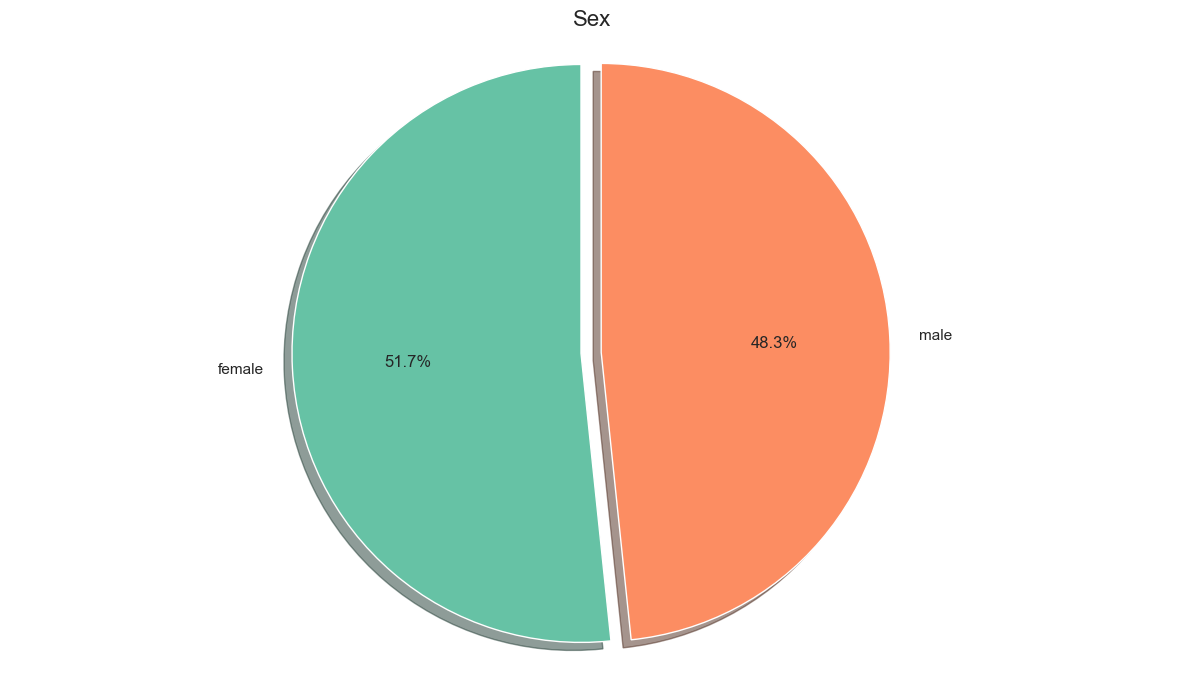

In [85]:
plot_pie(scd_1, 'Sex')

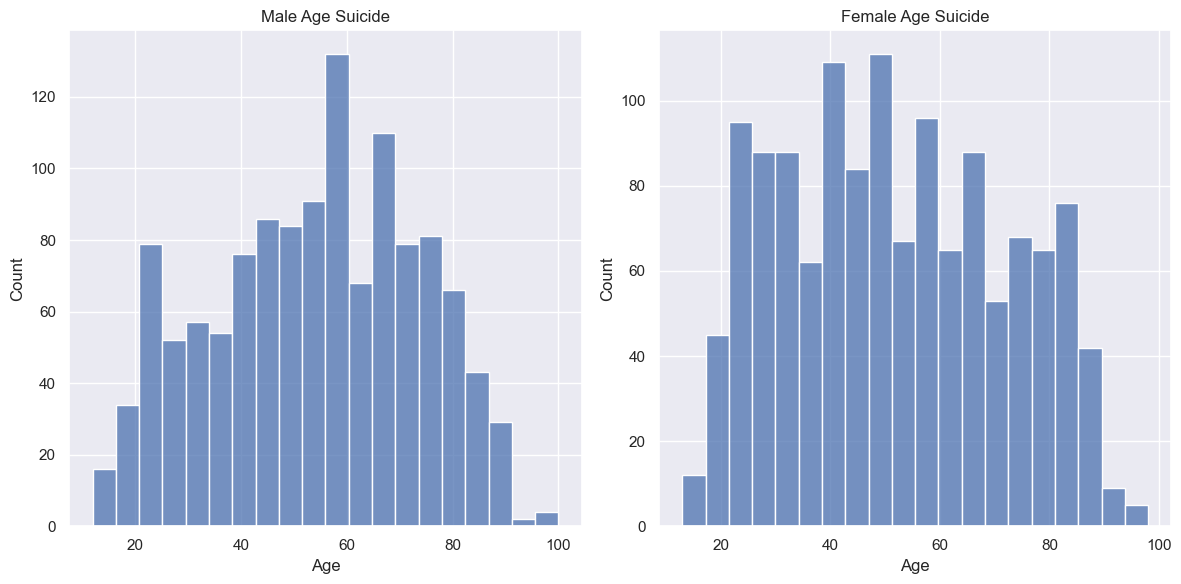

In [92]:
males = scd_1[scd_1.Sex == 'male']
females = scd_1[scd_1.Sex == 'female']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Plot the male age suicide distribution
sns.histplot(data = males, x = 'Age', bins = 20, ax = axes[0])
axes[0].set_title('Male Age Suicide')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot the female age suicide distribution
sns.histplot(data = females, x = 'Age', bins = 20, ax = axes[1])
axes[1].set_title('Female Age Suicide')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()